# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Reading Raw Data

In [5]:
copper_history = pd.read_csv("history.csv")
copper_history_2 = pd.read_csv("history3.csv")
copper_history

,Date,Price,Open,High,Low,Vol.,Change %
0,2008-07-07,3.8490,3.8745,3.9000,3.8030,15.01K,-2.53%
1,2008-07-03,3.9490,4.0235,4.0450,3.9260,15.83K,-2.82%
2,2008-07-02,4.0635,3.8940,4.0800,3.8775,22.95K,3.91%
3,2008-07-01,3.9105,3.8695,3.9245,3.8500,8.34K,0.72%
4,2008-06-30,3.8825,3.8800,3.9130,3.8325,12.24K,0.12%
...,...,...,...,...,...,...,...
4994,1988-08-05,0.8870,0.8870,0.8870,0.8870,NaN,1.03%
4995,1988-08-04,0.8780,0.8780,0.8780,0.8780,NaN,1.15%
4996,1988-08-03,0.8680,0.8680,0.8680,0.8680,NaN,0.93%
4997,1988-08-02,0.8600,0.8600,0.8600,0.8600,NaN,-0.64%


In [6]:
copper_history['Date'] = pd.to_datetime(copper_history['Date'])
copper_history_2

,Date,Price,Open,High,Low,Vol.,Change %
0,08/28/2023,3.7880,3.8022,3.8288,3.7800,NaN,-0.39%
1,08/27/2023,3.8027,3.7887,3.8057,3.7887,NaN,0.49%
2,08/25/2023,3.7840,3.7890,3.8290,3.7655,44.88K,-0.25%
3,08/24/2023,3.7935,3.8365,3.8390,3.7860,36.27K,-1.15%
4,08/23/2023,3.8375,3.7900,3.8425,3.7885,42.18K,1.29%
...,...,...,...,...,...,...,...
4010,01-08-08,3.2985,3.1305,3.3200,3.1300,19.91K,5.01%
4011,01-07-08,3.1410,3.1310,3.1890,3.1060,8.78K,-0.52%
4012,01-04-08,3.1575,3.1820,3.2350,3.1050,16.17K,-0.96%
4013,01-03-08,3.1880,3.0625,3.1900,3.0550,12.61K,4.05%


# Fixing Errors and Handling Missing Values

In [7]:
res = copper_history_2[copper_history_2['Date'].str.contains('/')]

In [8]:
slashes = pd.DataFrame(columns=copper_history.columns)

slashes = pd.concat([res], ignore_index=True)
slashes

,Date,Price,Open,High,Low,Vol.,Change %
0,08/28/2023,3.7880,3.8022,3.8288,3.7800,NaN,-0.39%
1,08/27/2023,3.8027,3.7887,3.8057,3.7887,NaN,0.49%
2,08/25/2023,3.7840,3.7890,3.8290,3.7655,44.88K,-0.25%
3,08/24/2023,3.7935,3.8365,3.8390,3.7860,36.27K,-1.15%
4,08/23/2023,3.8375,3.7900,3.8425,3.7885,42.18K,1.29%
...,...,...,...,...,...,...,...
2428,01/18/2008,3.2345,3.1520,3.2455,3.1450,10.10K,1.65%
2429,01/17/2008,3.1820,3.1725,3.2460,3.1300,12.21K,0.30%
2430,01/16/2008,3.1725,3.2100,3.2335,3.1470,11.95K,-2.13%
2431,01/15/2008,3.2415,3.3420,3.3600,3.1815,14.45K,-2.92%


In [9]:
copper_history_2 = copper_history_2[~copper_history_2['Date'].str.contains('/')]
copper_history_2

,Date,Price,Open,High,Low,Vol.,Change %
12,08-11-23,3.7190,3.7550,3.7675,3.6950,95.10K,-1.22%
13,08-10-23,3.7650,3.7875,3.8315,3.7465,81.24K,-0.49%
14,08-09-23,3.7835,3.7795,3.8270,3.7635,85.71K,0.45%
15,08-08-23,3.7665,3.8420,3.8420,3.7265,138.60K,-1.79%
16,08-07-23,3.8350,3.8520,3.8770,3.8250,70.87K,-0.84%
...,...,...,...,...,...,...,...
4010,01-08-08,3.2985,3.1305,3.3200,3.1300,19.91K,5.01%
4011,01-07-08,3.1410,3.1310,3.1890,3.1060,8.78K,-0.52%
4012,01-04-08,3.1575,3.1820,3.2350,3.1050,16.17K,-0.96%
4013,01-03-08,3.1880,3.0625,3.1900,3.0550,12.61K,4.05%


In [10]:
all_history = pd.DataFrame(columns=copper_history.columns)
all_history = pd.concat([copper_history, copper_history_2, slashes], ignore_index=True)

In [11]:
all_history

,Date,Price,Open,High,Low,Vol.,Change %
0,2008-07-07 00:00:00,3.8490,3.8745,3.9000,3.8030,15.01K,-2.53%
1,2008-07-03 00:00:00,3.9490,4.0235,4.0450,3.9260,15.83K,-2.82%
2,2008-07-02 00:00:00,4.0635,3.8940,4.0800,3.8775,22.95K,3.91%
3,2008-07-01 00:00:00,3.9105,3.8695,3.9245,3.8500,8.34K,0.72%
4,2008-06-30 00:00:00,3.8825,3.8800,3.9130,3.8325,12.24K,0.12%
...,...,...,...,...,...,...,...
9009,01/18/2008,3.2345,3.1520,3.2455,3.1450,10.10K,1.65%
9010,01/17/2008,3.1820,3.1725,3.2460,3.1300,12.21K,0.30%
9011,01/16/2008,3.1725,3.2100,3.2335,3.1470,11.95K,-2.13%
9012,01/15/2008,3.2415,3.3420,3.3600,3.1815,14.45K,-2.92%


In [12]:
rows_with_missing = all_history[all_history.isna().any(axis=1)]
rows_with_missing

,Date,Price,Open,High,Low,Vol.,Change %
406,2006-11-23 00:00:00,3.1410,3.1450,3.1450,3.0850,NaN,0.61%
1276,2003-06-05 00:00:00,0.7840,0.7840,0.7840,0.7840,NaN,0.26%
1398,2002-12-09 00:00:00,0.7355,0.7355,0.7355,0.7355,NaN,-1.41%
1454,2002-09-18 00:00:00,0.6750,0.6750,0.6750,0.6750,NaN,-1.53%
1456,2002-09-16 00:00:00,0.6860,0.6860,0.6860,0.6860,NaN,-1.58%
...,...,...,...,...,...,...,...
7314,02/17/2019,2.8160,2.8150,2.8170,2.8110,NaN,0.48%
7326,01/21/2019,2.6820,2.7090,2.7100,2.6750,NaN,-1.00%
7327,01/20/2019,2.7090,2.7120,2.7160,2.7090,NaN,-0.37%
7337,12/25/2018,2.6610,2.6640,2.6710,2.6490,NaN,-0.19%


In [13]:
all_history['Date'] = pd.to_datetime(all_history['Date'], errors='coerce')
all_history['Date'] = all_history['Date'].dt.date
all_history

,Date,Price,Open,High,Low,Vol.,Change %
0,2008-07-07,3.8490,3.8745,3.9000,3.8030,15.01K,-2.53%
1,2008-07-03,3.9490,4.0235,4.0450,3.9260,15.83K,-2.82%
2,2008-07-02,4.0635,3.8940,4.0800,3.8775,22.95K,3.91%
3,2008-07-01,3.9105,3.8695,3.9245,3.8500,8.34K,0.72%
4,2008-06-30,3.8825,3.8800,3.9130,3.8325,12.24K,0.12%
...,...,...,...,...,...,...,...
9009,2008-01-18,3.2345,3.1520,3.2455,3.1450,10.10K,1.65%
9010,2008-01-17,3.1820,3.1725,3.2460,3.1300,12.21K,0.30%
9011,2008-01-16,3.1725,3.2100,3.2335,3.1470,11.95K,-2.13%
9012,2008-01-15,3.2415,3.3420,3.3600,3.1815,14.45K,-2.92%


In [14]:
all_history = all_history.drop(columns=['Vol.', 'Change %', 'Open', 'High', 'Low'])

In [15]:
all_history = all_history.sort_values(by='Date')

In [16]:
all_history = all_history.reset_index(drop=True)

In [17]:
all_history

,Date,Price
0,1988-08-01,0.8655
1,1988-08-02,0.8600
2,1988-08-03,0.8680
3,1988-08-04,0.8780
4,1988-08-05,0.8870
...,...,...
9009,2023-08-23,3.8375
9010,2023-08-24,3.7935
9011,2023-08-25,3.7840
9012,2023-08-27,3.8027


# Saving Cleaned Dataset

In [18]:
all_history.to_csv('output.csv', index=False)

# Plotting Data

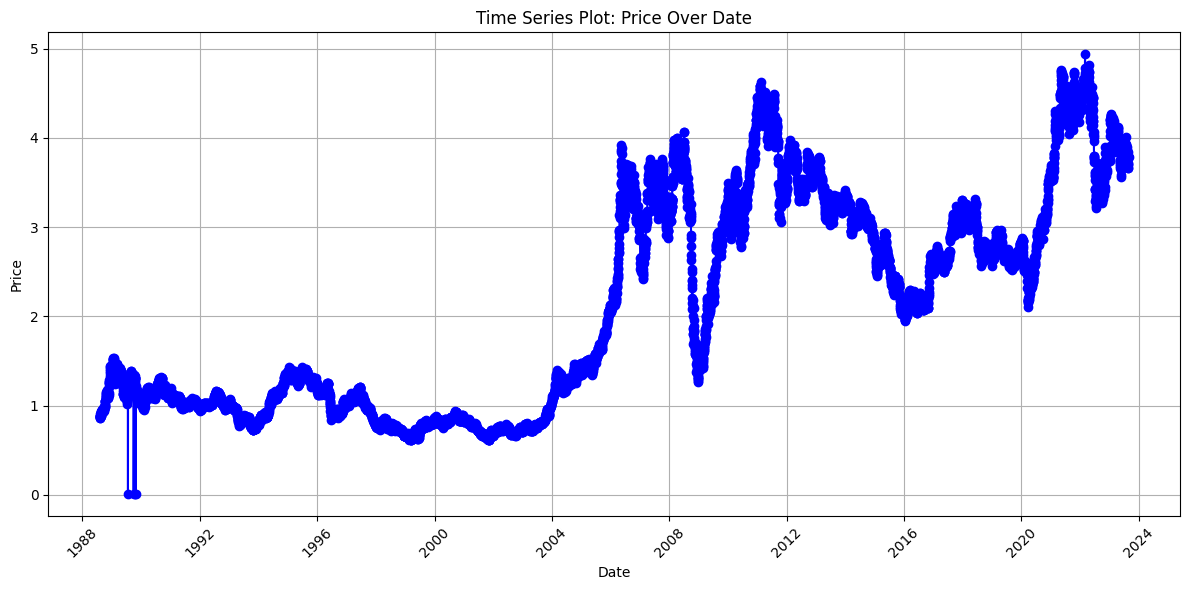

In [19]:
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(all_history['Date'], all_history['Price'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series Plot: Price Over Date')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()